In [1]:
# your_script.py
import os
from helpers import DatasetProcessorData

# Define the directory where the files are saved
load_dir = './data/energy'

# Load each processor's data
mnist_data = DatasetProcessorData.load_data(os.path.join(load_dir, 'mnist_DP.pkl'))
kmnist_data = DatasetProcessorData.load_data(os.path.join(load_dir, 'kmnist_DP.pkl'))
fmnist_data = DatasetProcessorData.load_data(os.path.join(load_dir, 'fmnist_DP.pkl'))
emnist_data = DatasetProcessorData.load_data(os.path.join(load_dir, 'emnist_DP.pkl'))
notmnist_data = DatasetProcessorData.load_data(os.path.join(load_dir, 'notmnist_DP.pkl'))

# Now you can access the results from the data objects
print(f"MNIST max softmax values: {mnist_data.max_softmax_values}")
print(f"KMNIST max softmax values: {kmnist_data.max_softmax_values}")
print(f"FMNIST max softmax values: {fmnist_data.max_softmax_values}")
print(f"EMNIST max softmax values: {emnist_data.max_softmax_values}")
print(f"notMNIST max softmax values: {notmnist_data.max_softmax_values}")

# Example: Print X_test for MNIST
print(f"MNIST X_test: {mnist_data.X_test_jax}")

MNIST max softmax values: [0.99983835 0.9999666  0.9977149  ... 0.9999995  0.9999633  0.96945083]
KMNIST max softmax values: [0.9679183  0.76919377 0.79920596 ... 0.91362894 0.5792618  0.90153044]
FMNIST max softmax values: [0.99945444 0.9753269  0.91486347 ... 0.8308811  0.9994799  0.82589376]
EMNIST max softmax values: [0.5151212  0.8430155  0.7561936  ... 0.97716796 0.9876317  0.9514899 ]
notMNIST max softmax values: [0.67722696 0.9477653  0.52510583 ... 0.7860869  0.9914704  0.8652807 ]
MNIST X_test: [[-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 ...
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]

/tmp/ipykernel_2551448/4153679367.py:61: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.0)


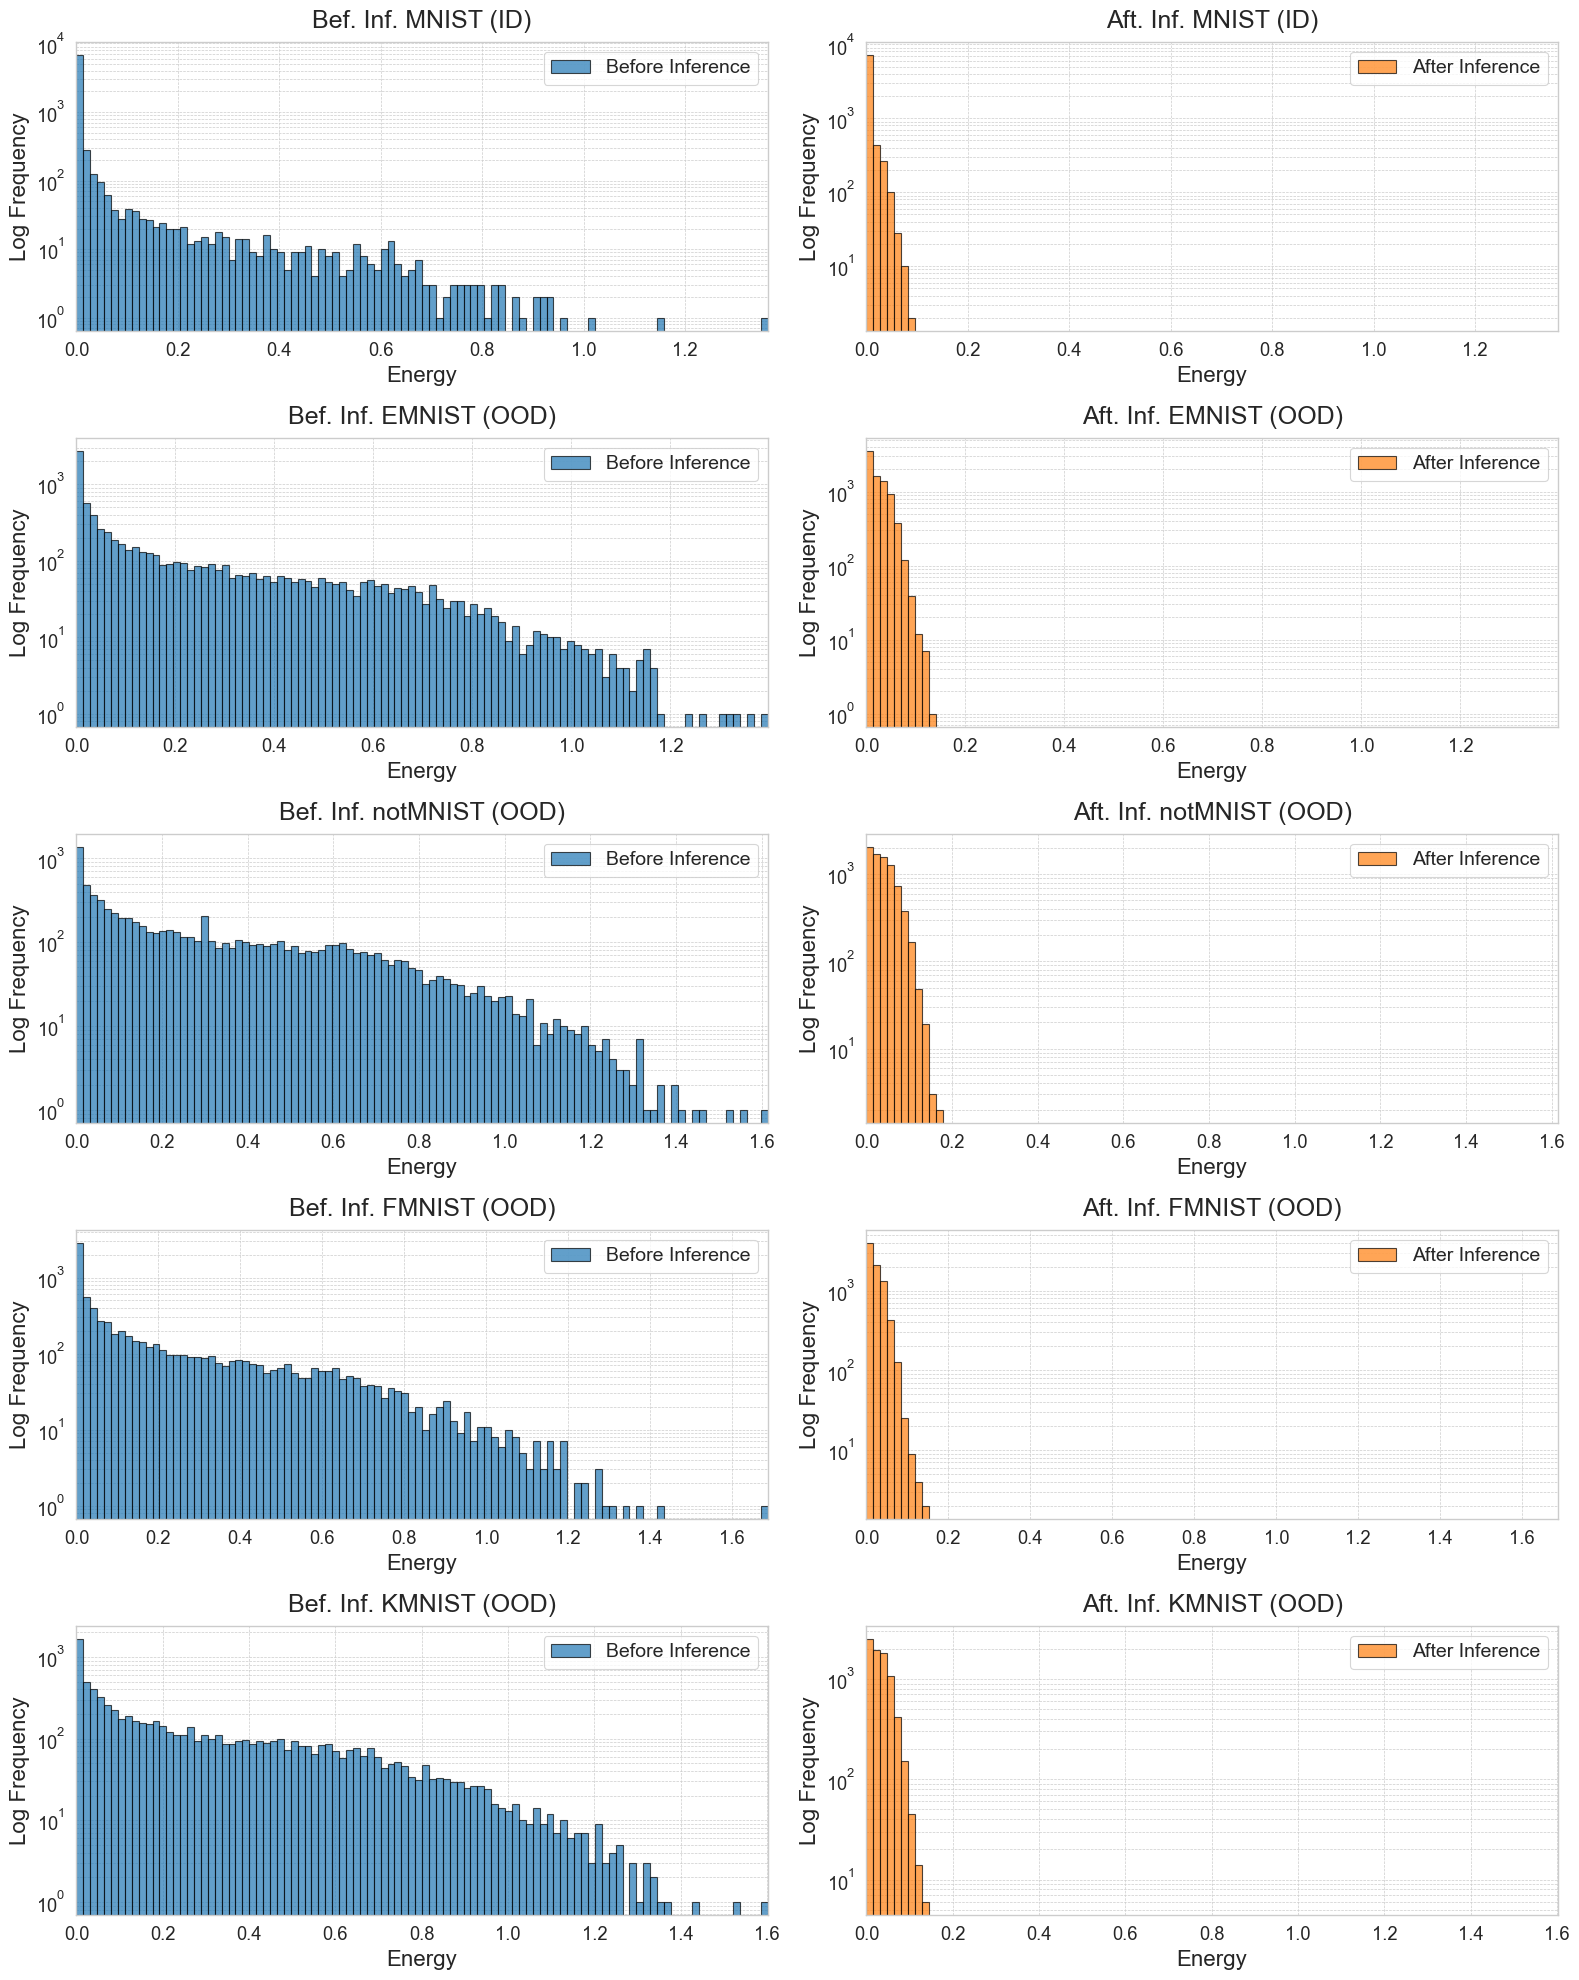

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# Set the aesthetic style of the plots
sns.set(style="whitegrid", context="paper", font_scale=1.5)
rcParams.update({
    "font.family": "sans-serif",
    "pdf.fonttype": 42,
})

# Define the function to plot energy distribution histograms
def plot_energy_distribution_histograms(datasets, dataset_names, bins=100):
    """
    Plot histograms of the energy distributions before and after inference steps for multiple datasets.

    Parameters:
    - datasets: List of tuples containing (e_pre, e_post) for each dataset.
    - dataset_names: List of names for each dataset.
    - bins: Number of bins for the histogram.
    """
    # Set up the figure and axis
    fig, axes = plt.subplots(len(datasets), 2, figsize=(16, 4 * len(datasets)), constrained_layout=True)
    
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        e_pre, e_post = data

        # Convert JAX arrays to NumPy arrays for plotting
        e_pre_np = np.array(e_pre)
        e_post_np = np.array(e_post)

        # Determine the common x limits and common bins
        all_data = np.concatenate((e_pre_np, e_post_np))
        x_min, x_max = all_data.min(), all_data.max()
        common_bins = np.linspace(x_min, x_max, bins + 1)

        # Plot histogram for e_pre
        ax = axes[i, 0]
        counts_pre, _, _ = ax.hist(e_pre_np, bins=common_bins, alpha=0.7, color='#1f77b4', edgecolor='black', label='Before Inference')
        ax.set_yscale('log')
        ax.set_title(f'Bef. Inf. {name}', fontsize=18, pad=10)
        ax.set_xlabel('Energy', fontsize=16)
        ax.set_ylabel('Log Frequency', fontsize=16)
        ax.legend(loc='upper right', fontsize=14)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.set_xlim(x_min, x_max)

        # Plot histogram for e_post
        ax = axes[i, 1]
        counts_post, _, _ = ax.hist(e_post_np, bins=common_bins, alpha=0.7, color='#ff7f0e', edgecolor='black', label='After Inference')
        ax.set_yscale('log')
        ax.set_title(f'Aft. Inf. {name}', fontsize=18, pad=10)
        ax.set_xlabel('Energy', fontsize=16)
        ax.set_ylabel('Log Frequency', fontsize=16)
        ax.legend(loc='upper right', fontsize=14)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.set_xlim(x_min, x_max)

    # Adjust the layout
    fig.tight_layout(pad=1.0)
    
    # Save the figure as PDF
    plt.savefig("energy_distribution_histograms.pdf", format='pdf', dpi=300)
    
    plt.show()

# Assuming mnist_data, emnist_data, notmnist_data, fmnist_data, kmnist_data are already defined
datasets = [
    (mnist_data.e_pre, mnist_data.e_post),
    (emnist_data.e_pre, emnist_data.e_post),    
    (notmnist_data.e_pre, notmnist_data.e_post),
    (fmnist_data.e_pre, fmnist_data.e_post),
    (kmnist_data.e_pre, kmnist_data.e_post)
]

dataset_names = ['MNIST (ID)', 'EMNIST (OOD)', 'notMNIST (OOD)', 'FMNIST (OOD)', 'KMNIST (OOD)']

# Plot the energy distributions for all datasets
plot_energy_distribution_histograms(datasets, dataset_names)


/tmp/ipykernel_2551448/252735826.py:79: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.0)


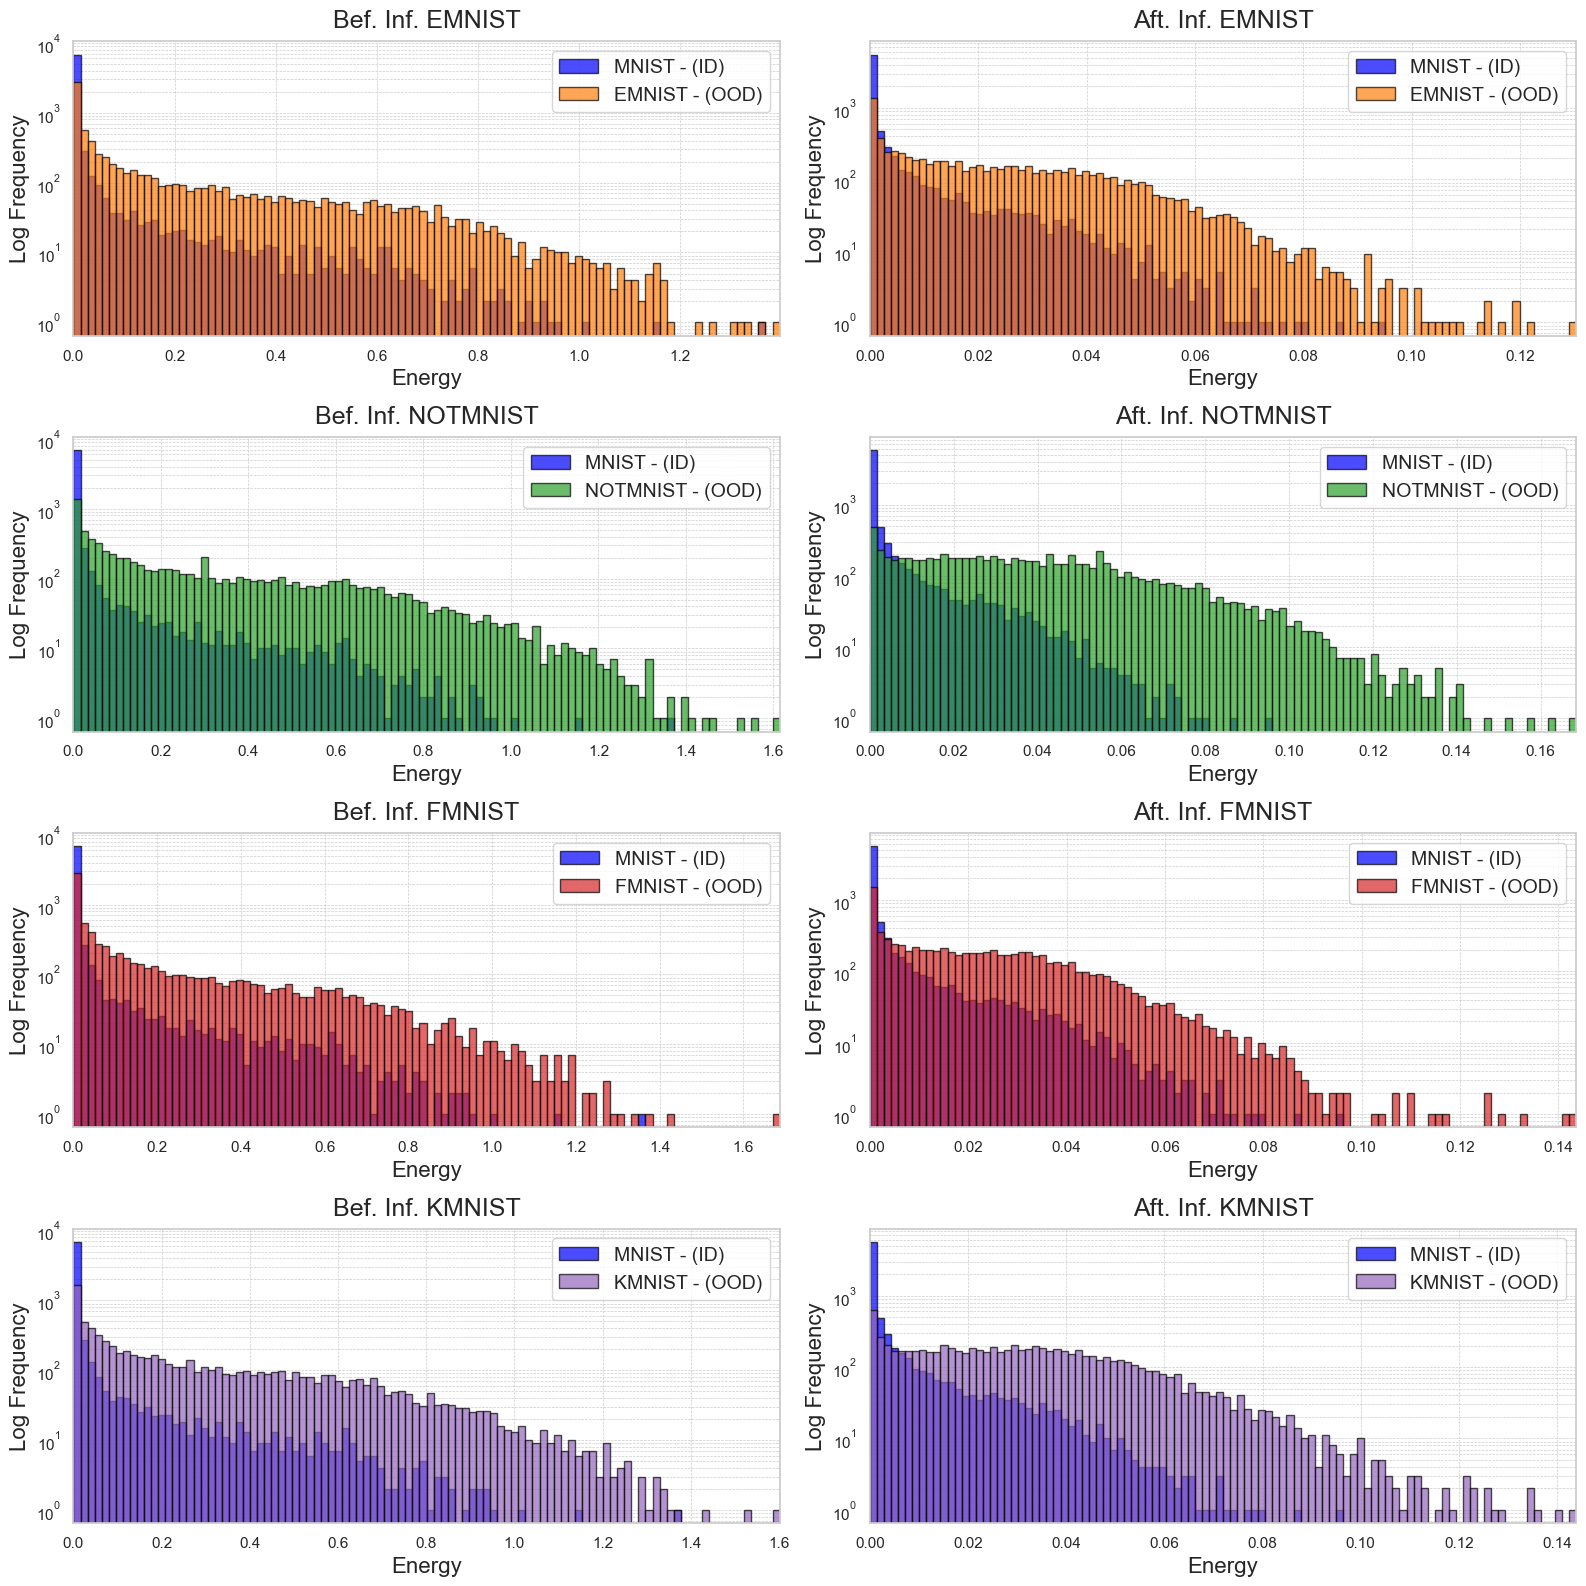

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# Set the aesthetic style of the plots
sns.set(style="whitegrid", context="paper", font_scale=1.5)
rcParams.update({
    "font.family": "sans-serif",
    "pdf.fonttype": 42,
})

# Define colors for different datasets
colors = {
    'mnist': '#1f77b4',
    'emnist': '#ff7f0e',
    'notmnist': '#2ca02c',
    'fmnist': '#d62728',
    'kmnist': '#9467bd'
}

def plot_id_vs_ood_energy_distributions(id_data, ood_data_dict, bins=100):
    """
    Plot overlaid histograms of the energy distributions for in-distribution (ID) and out-of-distribution (OOD) data.

    Parameters:
    - id_data: Tuple containing (e_pre, e_post) for in-distribution data.
    - ood_data_dict: Dictionary containing dataset names as keys and tuples of (e_pre, e_post) as values for out-of-distribution data.
    - bins: Number of bins for the histogram.
    """
    e_pre_id, e_post_id = id_data

    # Convert JAX arrays to NumPy arrays for plotting
    e_pre_id_np = np.array(e_pre_id)
    e_post_id_np = np.array(e_post_id)

    # Use seaborn style for better aesthetics
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(len(ood_data_dict), 2, figsize=(16, 4 * len(ood_data_dict)), constrained_layout=True)

    for i, (name, (e_pre_ood, e_post_ood)) in enumerate(ood_data_dict.items()):
        e_pre_ood_np = np.array(e_pre_ood)
        e_post_ood_np = np.array(e_post_ood)

        # Determine the common x limits and common bins
        all_data_pre = np.concatenate([e_pre_id_np, e_pre_ood_np])
        all_data_post = np.concatenate([e_post_id_np, e_post_ood_np])
        x_min_pre, x_max_pre = all_data_pre.min(), all_data_pre.max()
        x_min_post, x_max_post = all_data_post.min(), all_data_post.max()
        common_bins_pre = np.linspace(x_min_pre, x_max_pre, bins + 1)
        common_bins_post = np.linspace(x_min_post, x_max_post, bins + 1)

        # Plot histograms for ID and OOD before inference
        ax = axes[i, 0]
        ax.hist(e_pre_id_np, bins=common_bins_pre, alpha=0.7, color='blue', edgecolor='black', label='MNIST - (ID)')
        ax.hist(e_pre_ood_np, bins=common_bins_pre, alpha=0.7, color=colors[name], edgecolor='black', label=f'{name.upper()} - (OOD)')
        ax.set_yscale('log')
        ax.set_title(f'Bef. Inf. {name.upper()}', fontsize=18, pad=10)
        ax.set_xlabel('Energy', fontsize=16)
        ax.set_ylabel('Log Frequency', fontsize=16)
        ax.legend(loc='upper right', fontsize=14)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.set_xlim(x_min_pre, x_max_pre)

        # Plot histograms for ID and OOD after inference
        ax = axes[i, 1]
        ax.hist(e_post_id_np, bins=common_bins_post, alpha=0.7, color='blue', edgecolor='black', label='MNIST - (ID)')
        ax.hist(e_post_ood_np, bins=common_bins_post, alpha=0.7, color=colors[name], edgecolor='black', label=f'{name.upper()} - (OOD)')
        ax.set_yscale('log')
        ax.set_title(f'Aft. Inf. {name.upper()}', fontsize=18, pad=10)
        ax.set_xlabel('Energy', fontsize=16)
        ax.set_ylabel('Log Frequency', fontsize=16)
        ax.legend(loc='upper right', fontsize=14)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.set_xlim(x_min_post, x_max_post)

    # Adjust layout for better fit
    fig.tight_layout(pad=1.0)
    
    # Save the figure as PDF
    plt.savefig("id_vs_ood_energy_distribution_histograms.pdf", format='pdf', dpi=300)
    
    plt.show()

# Assuming mnist_data, emnist_data, notmnist_data, fmnist_data, kmnist_data are already defined
id_data = (mnist_data.e_pre, mnist_data.e_post)
ood_data_dict = {
    'emnist': (emnist_data.e_pre, emnist_data.e_post),    
    'notmnist': (notmnist_data.e_pre, notmnist_data.e_post),
    'fmnist': (fmnist_data.e_pre, fmnist_data.e_post),
    'kmnist': (kmnist_data.e_pre, kmnist_data.e_post)
}

# Plot the energy distributions for ID vs each OOD dataset
plot_id_vs_ood_energy_distributions(id_data, ood_data_dict)


/tmp/ipykernel_2551448/3078775691.py:60: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.0)


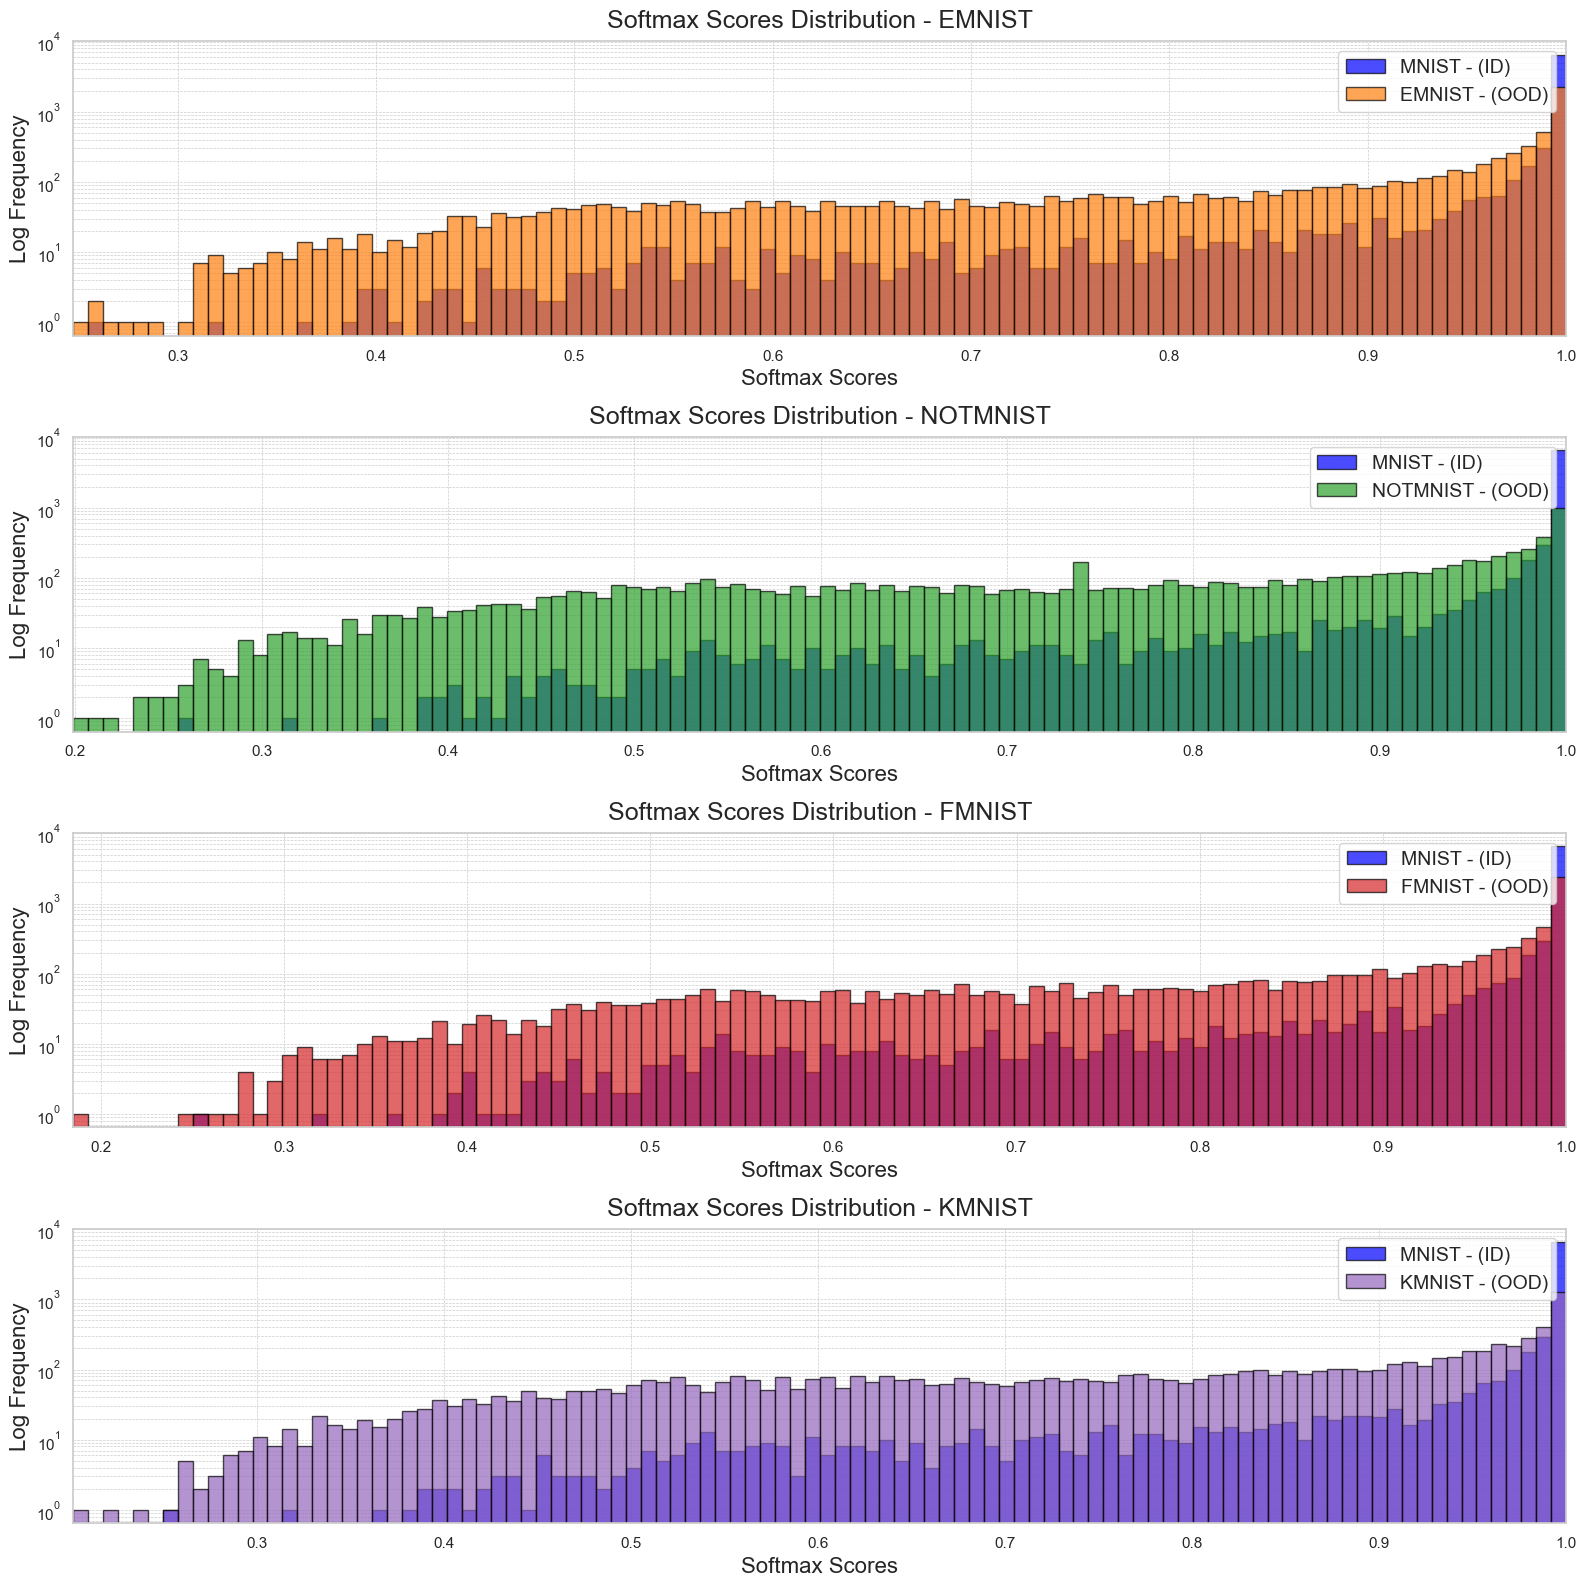

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# Set the aesthetic style of the plots
sns.set(style="whitegrid", context="paper", font_scale=1.5)
rcParams.update({
    "font.family": "sans-serif",
    "pdf.fonttype": 42,
})

# Define colors for different datasets
colors = {
    'mnist': '#1f77b4',
    'emnist': '#ff7f0e',
    'notmnist': '#2ca02c',
    'fmnist': '#d62728',
    'kmnist': '#9467bd'
}

def plot_id_vs_ood_softmax_distributions(id_softmax_values, ood_softmax_values_dict, bins=100):
    """
    Plot overlaid histograms of the softmax values distributions for in-distribution (ID) and out-of-distribution (OOD) data.

    Parameters:
    - id_softmax_values: Softmax values for in-distribution data.
    - ood_softmax_values_dict: Dictionary containing dataset names as keys and softmax values as values for out-of-distribution data.
    - bins: Number of bins for the histogram.
    """
    # Convert JAX arrays to NumPy arrays for plotting
    id_softmax_values_np = np.array(id_softmax_values)

    # Use seaborn style for better aesthetics
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(len(ood_softmax_values_dict), 1, figsize=(16, 4 * len(ood_softmax_values_dict)), constrained_layout=True)

    for i, (name, ood_softmax_values) in enumerate(ood_softmax_values_dict.items()):
        ood_softmax_values_np = np.array(ood_softmax_values)

        # Determine the common x limits and common bins
        all_data = np.concatenate([id_softmax_values_np, ood_softmax_values_np])
        x_min, x_max = all_data.min(), all_data.max()
        common_bins = np.linspace(x_min, x_max, bins + 1)

        # Plot histograms for ID and OOD softmax values
        ax = axes[i]
        ax.hist(id_softmax_values_np, bins=common_bins, alpha=0.7, color='blue', edgecolor='black', label='MNIST - (ID)')
        ax.hist(ood_softmax_values_np, bins=common_bins, alpha=0.7, color=colors[name], edgecolor='black', label=f'{name.upper()} - (OOD)')
        ax.set_yscale('log')
        ax.set_title(f'Softmax Scores Distribution - {name.upper()}', fontsize=18, pad=10)
        ax.set_xlabel('Softmax Scores', fontsize=16)
        ax.set_ylabel('Log Frequency', fontsize=16)
        ax.legend(loc='upper right', fontsize=14)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.set_xlim(x_min, x_max)

    # Adjust layout for better fit
    fig.tight_layout(pad=1.0)
    
    # Save the figure as PDF
    plt.savefig("id_vs_ood_softmax_distribution_histograms.pdf", format='pdf', dpi=300)
    
    plt.show()

# Assuming mnist_data, emnist_data, notmnist_data, fmnist_data, kmnist_data are already defined
id_softmax_values = mnist_data.max_softmax_values
ood_softmax_values_dict = {
    'emnist': emnist_data.max_softmax_values,    
    'notmnist': notmnist_data.max_softmax_values,
    'fmnist': fmnist_data.max_softmax_values,
    'kmnist': kmnist_data.max_softmax_values
}

# Plot the softmax distributions for ID vs each OOD dataset
plot_id_vs_ood_softmax_distributions(id_softmax_values, ood_softmax_values_dict)


/tmp/ipykernel_2551448/1556691331.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Log Energy', data=plot_data, palette="Set3")


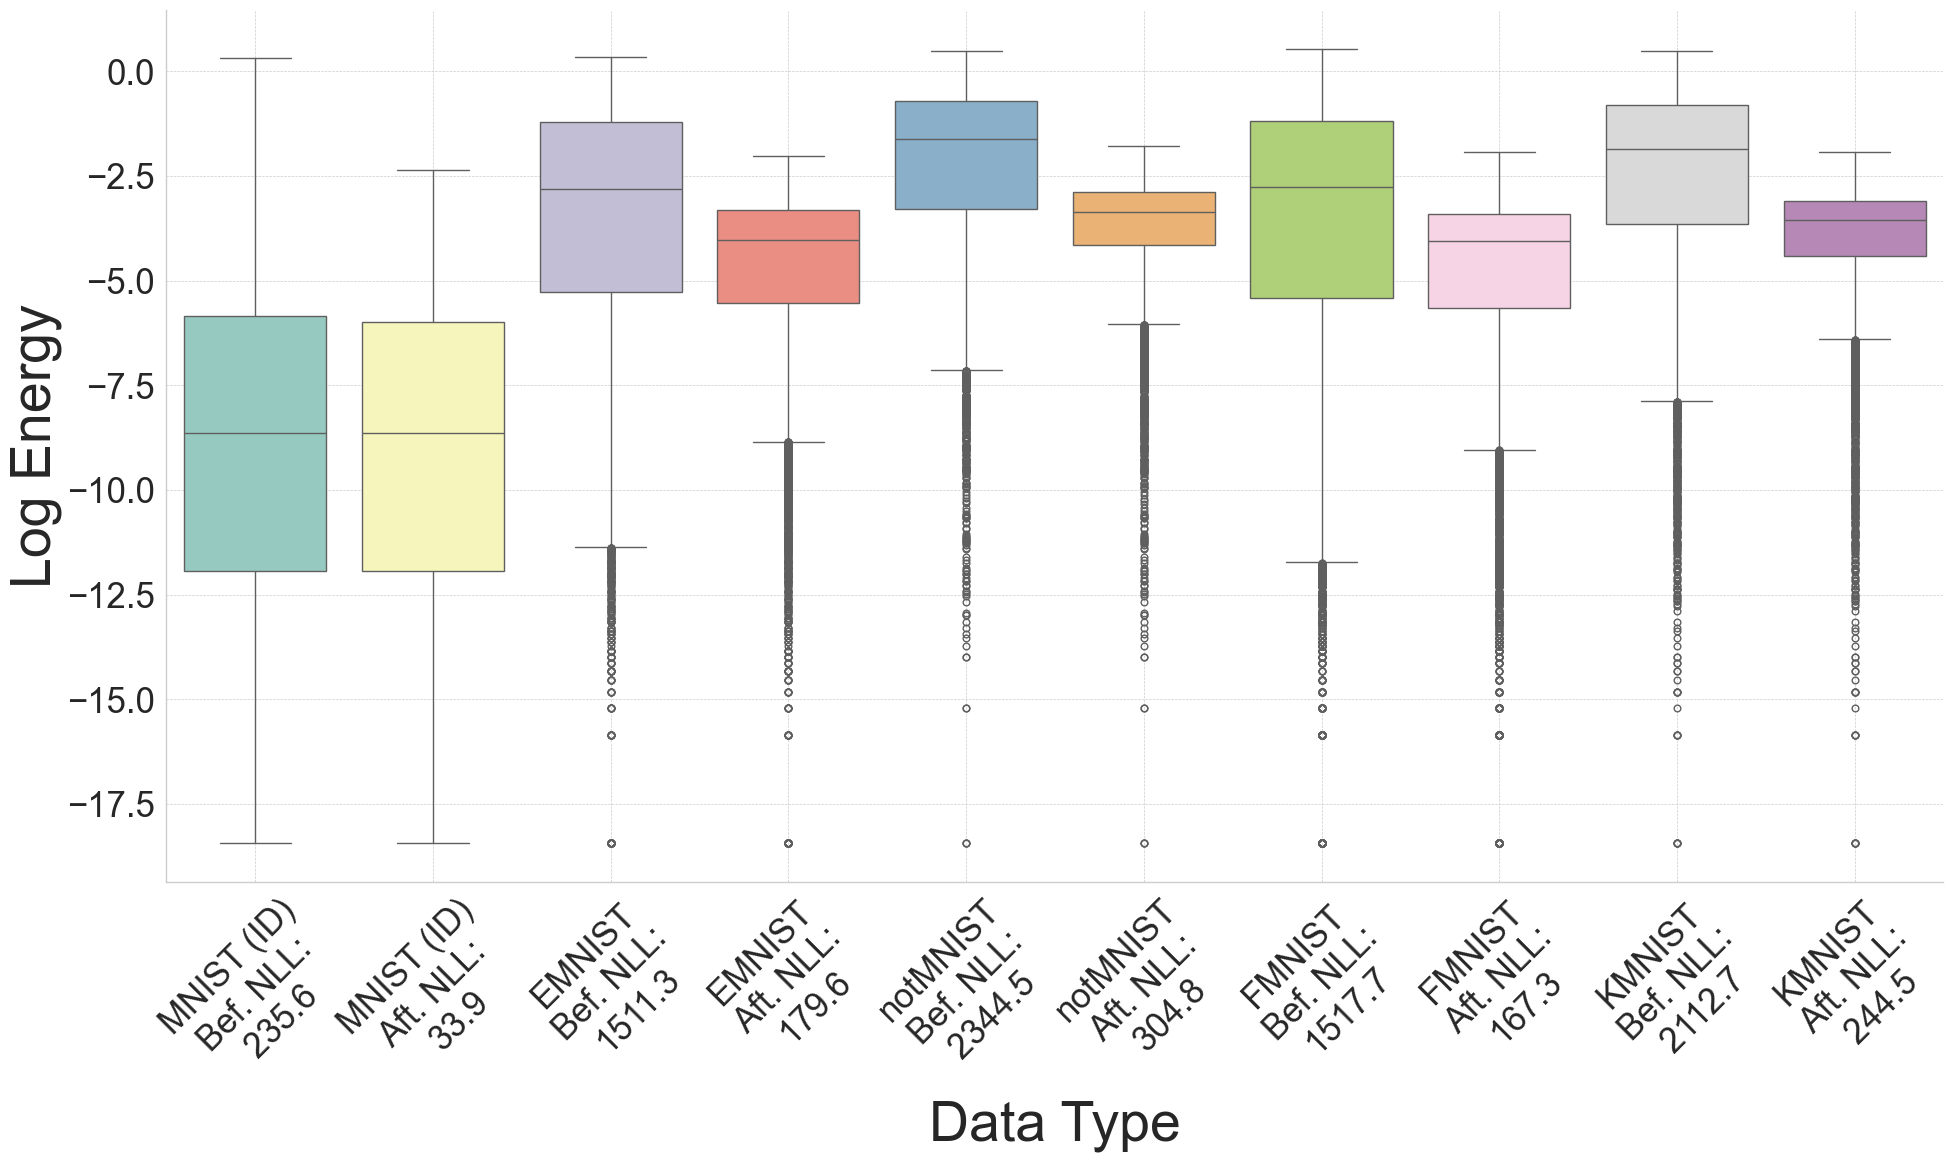

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_energy_box_plots_log(datasets, dataset_names, bins=100):
    """
    Create box plots to show the log of the energies for in-distribution (ID) and out-of-distribution (OOD) data, including log-likelihood values in the labels.

    Parameters:
    - datasets: List of tuples containing (e_pre, e_post, NLL_pre, NLL_post) for each dataset.
    - dataset_names: List of names for each dataset.
    - bins: Number of bins for the histogram.
    """
    data = []

    for i, (e_pre, e_post, NLL_pre, NLL_post) in enumerate(datasets):
        dataset_name = dataset_names[i]
        
        # Compute the logarithm of the energies
        log_e_pre_np = np.log(np.array(e_pre) + 1e-8)
        log_e_post_np = np.log(np.array(e_post) + 1e-8)

        # Append data for plotting
        data.append(pd.DataFrame({
            'Log Energy': np.concatenate([log_e_pre_np, log_e_post_np]),
            'Type': [f'{dataset_name}\nBef. NLL:\n{NLL_pre:.1f}'] * len(log_e_pre_np) + [f'{dataset_name}\nAft. NLL:\n{NLL_post:.1f}'] * len(log_e_post_np)
        }))

    # Concatenate all data
    plot_data = pd.concat(data)

    # Create the plot
    sns.set(style="whitegrid", context="paper", font_scale=2.0)
    plt.figure(figsize=(20, 12))

    # Create box plot
    sns.boxplot(x='Type', y='Log Energy', data=plot_data, palette="Set3")

    # Set plot labels
    plt.xlabel('Data Type', fontsize=40)
    plt.ylabel('Log Energy', fontsize=40)

    # Improve the aesthetics
    sns.despine()
    #plt.xticks(rotation=45, fontsize=25, ha='right')
    plt.xticks(rotation=45, fontsize=25, ha='center')
    plt.yticks(fontsize=25)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Save the figure
    plt.savefig("log_energy_box_plots_with_NLL.pdf", dpi=300)

    plt.show()

# Assuming mnist_data, emnist_data, notmnist_data, fmnist_data, kmnist_data are already defined and contain necessary NLL values
datasets = [
    (mnist_data.e_pre, mnist_data.e_post, mnist_data.NLL_pre, mnist_data.NLL_post),
    (emnist_data.e_pre, emnist_data.e_post, emnist_data.NLL_pre, emnist_data.NLL_post),
    (notmnist_data.e_pre, notmnist_data.e_post, notmnist_data.NLL_pre, notmnist_data.NLL_post),
    (fmnist_data.e_pre, fmnist_data.e_post, fmnist_data.NLL_pre, fmnist_data.NLL_post),
    (kmnist_data.e_pre, kmnist_data.e_post, kmnist_data.NLL_pre, kmnist_data.NLL_post)
]

dataset_names = ['MNIST (ID)', 'EMNIST', 'notMNIST', 'FMNIST', 'KMNIST']

# Plot the energy box plots
plot_energy_box_plots_log(datasets, dataset_names)


/tmp/ipykernel_2551448/3805266851.py:71: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.0)


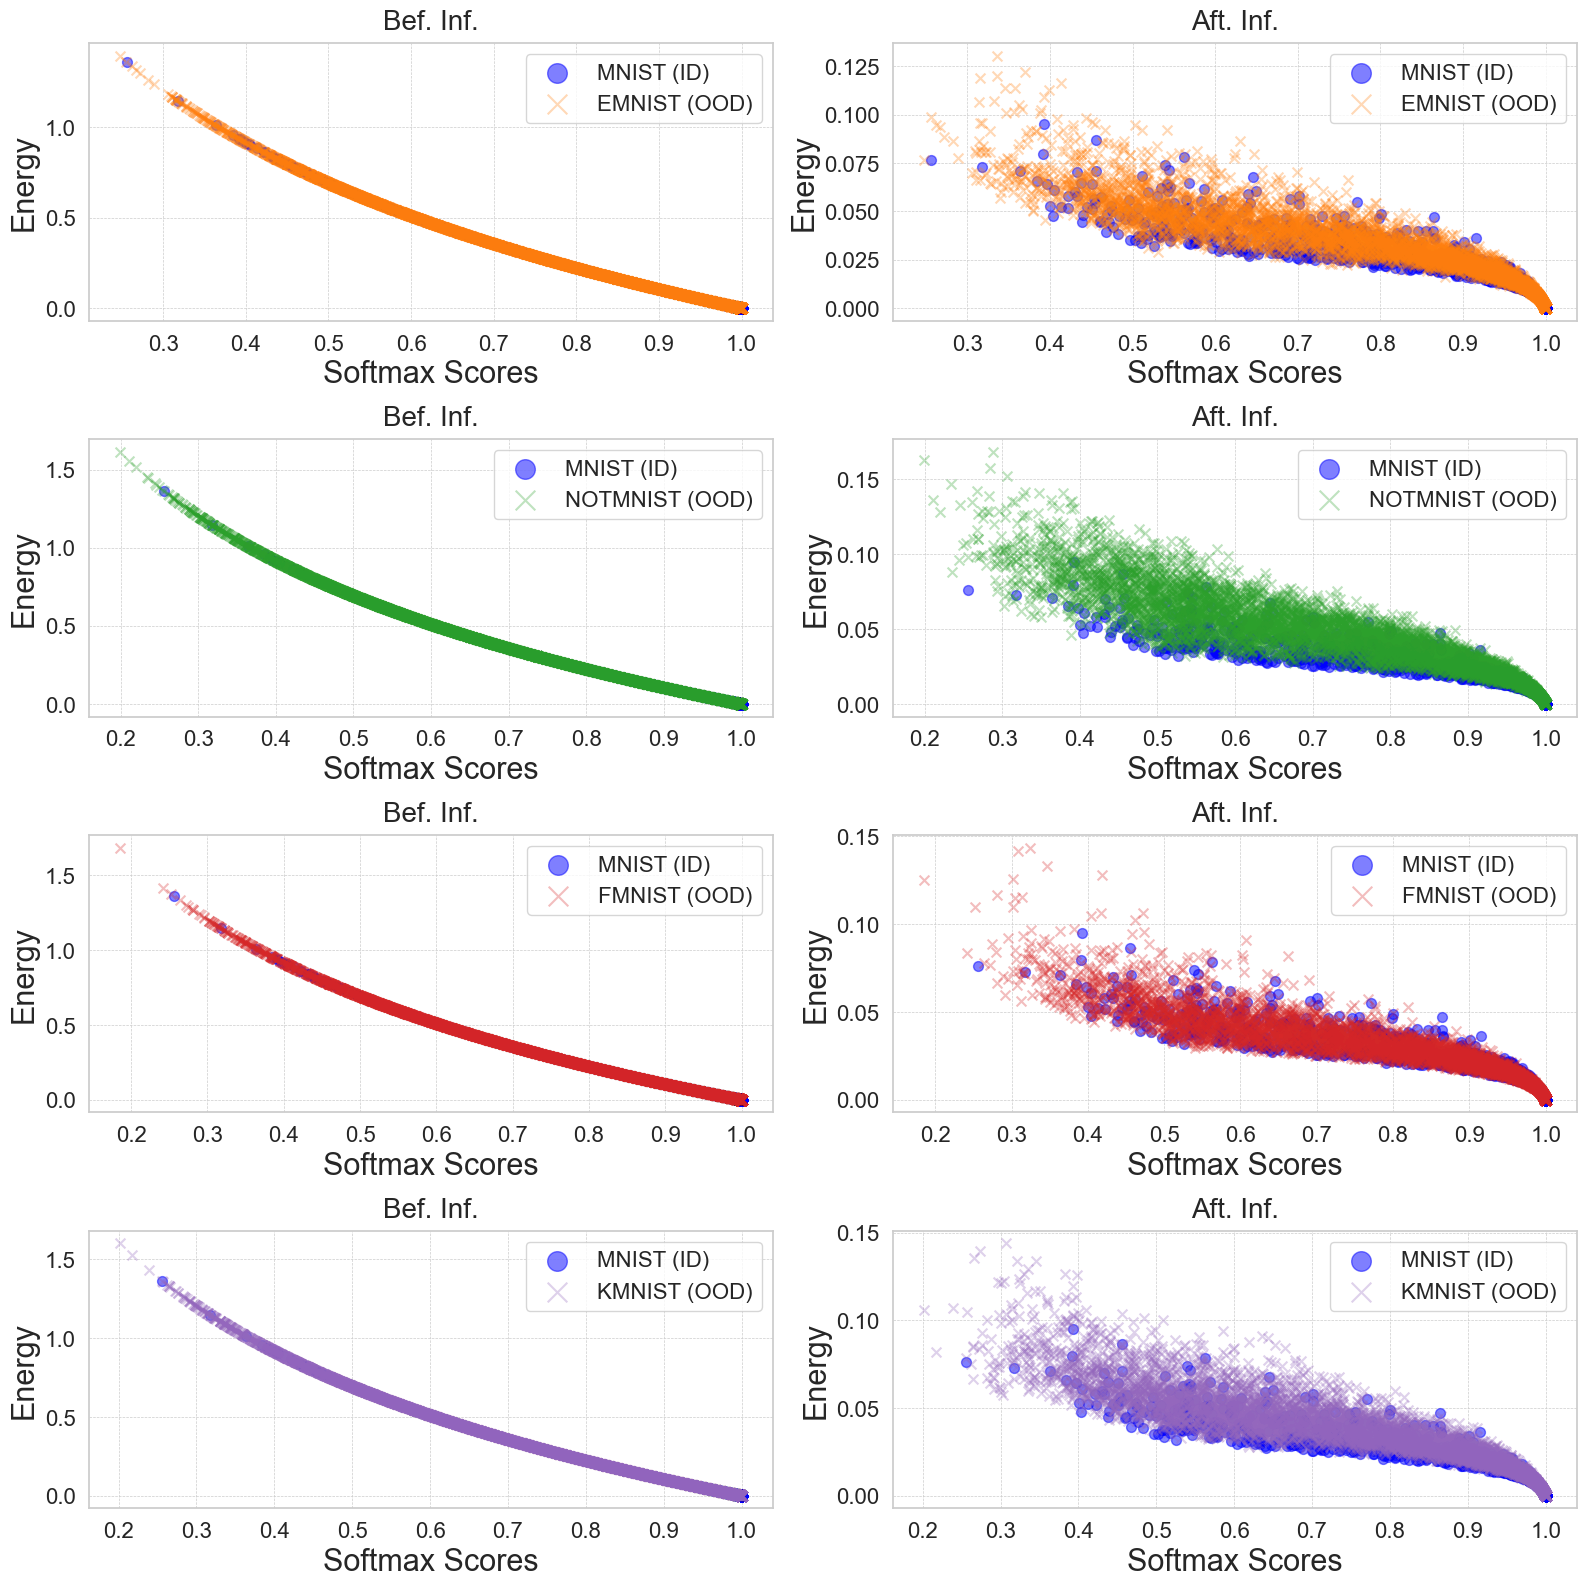

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# Set the aesthetic style of the plots
sns.set(style="whitegrid", context="paper", font_scale=1.5)
rcParams.update({
    "font.family": "sans-serif",
    "pdf.fonttype": 42,
})

# Define colors for different datasets
colors = {
    'mnist': 'blue',
    'emnist': '#ff7f0e',
    'notmnist': '#2ca02c',
    'fmnist': '#d62728',
    'kmnist': '#9467bd'
}

def plot_energy_vs_confidence(id_data, ood_data_dict, bins=100):
    """
    Create scatter plots of energies versus softmax scores (confidence) for both in-distribution (ID) and out-of-distribution (OOD) datasets.

    Parameters:
    - id_data: Tuple containing (e_pre, e_post, max_softmax_values) for in-distribution data.
    - ood_data_dict: Dictionary containing dataset names as keys and tuples of (e_pre, e_post, max_softmax_values) as values for out-of-distribution data.
    - bins: Number of bins for the histogram.
    """
    e_pre_id, e_post_id, max_softmax_id = id_data

    # Convert JAX arrays to NumPy arrays for plotting
    e_pre_id_np = np.array(e_pre_id)
    e_post_id_np = np.array(e_post_id)
    max_softmax_id_np = np.array(max_softmax_id)

    # Use seaborn style for better aesthetics
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(len(ood_data_dict), 2, figsize=(16, 4 * len(ood_data_dict)), constrained_layout=True)

    for i, (name, (e_pre_ood, e_post_ood, max_softmax_ood)) in enumerate(ood_data_dict.items()):
        e_pre_ood_np = np.array(e_pre_ood)
        e_post_ood_np = np.array(e_post_ood)
        max_softmax_ood_np = np.array(max_softmax_ood)

        # Scatter plot for e_pre vs. max_softmax_values (ID and OOD before inference)
        ax = axes[i, 0]
        ax.scatter(max_softmax_id_np, e_pre_id_np, color=colors['mnist'], alpha=0.5, s=50, label='MNIST (ID)', marker='o')
        ax.scatter(max_softmax_ood_np, e_pre_ood_np, color=colors[name], alpha=0.3, s=50, label=f'{name.upper()} (OOD)', marker='x')
        ax.set_title('Bef. Inf.', fontsize=20, pad=10)
        ax.set_xlabel('Softmax Scores', fontsize=22)
        ax.set_ylabel('Energy', fontsize=22)
        ax.legend(loc='upper right', fontsize=16, markerscale=2)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.tick_params(axis='both', which='major', labelsize=16)

        # Scatter plot for e_post vs. max_softmax_values (ID and OOD after inference)
        ax = axes[i, 1]
        ax.scatter(max_softmax_id_np, e_post_id_np, color=colors['mnist'], alpha=0.5, s=50, label='MNIST (ID)', marker='o')
        ax.scatter(max_softmax_ood_np, e_post_ood_np, color=colors[name], alpha=0.3, s=50, label=f'{name.upper()} (OOD)', marker='x')
        ax.set_title('Aft. Inf.', fontsize=20, pad=10)
        ax.set_xlabel('Softmax Scores', fontsize=22)
        ax.set_ylabel('Energy', fontsize=22)
        ax.legend(loc='upper right', fontsize=16, markerscale=2)
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.tick_params(axis='both', which='major', labelsize=16)

    # Adjust layout for better fit
    fig.tight_layout(pad=1.0)
    
    # Save the figure as PDF
    plt.savefig("scatter_energy_vs_confidence.pdf", format='pdf', dpi=300)
    
    plt.show()

# Assuming mnist_data, emnist_data, notmnist_data, fmnist_data, kmnist_data are already defined
id_data = (mnist_data.e_pre, mnist_data.e_post, mnist_data.max_softmax_values)
ood_data_dict = {
    'emnist': (emnist_data.e_pre, emnist_data.e_post, emnist_data.max_softmax_values),    
    'notmnist': (notmnist_data.e_pre, notmnist_data.e_post, notmnist_data.max_softmax_values),
    'fmnist': (fmnist_data.e_pre, fmnist_data.e_post, fmnist_data.max_softmax_values),
    'kmnist': (kmnist_data.e_pre, kmnist_data.e_post, kmnist_data.max_softmax_values)
}

# Plot the energy vs. confidence scatter plots for ID vs each OOD dataset
plot_energy_vs_confidence(id_data, ood_data_dict)


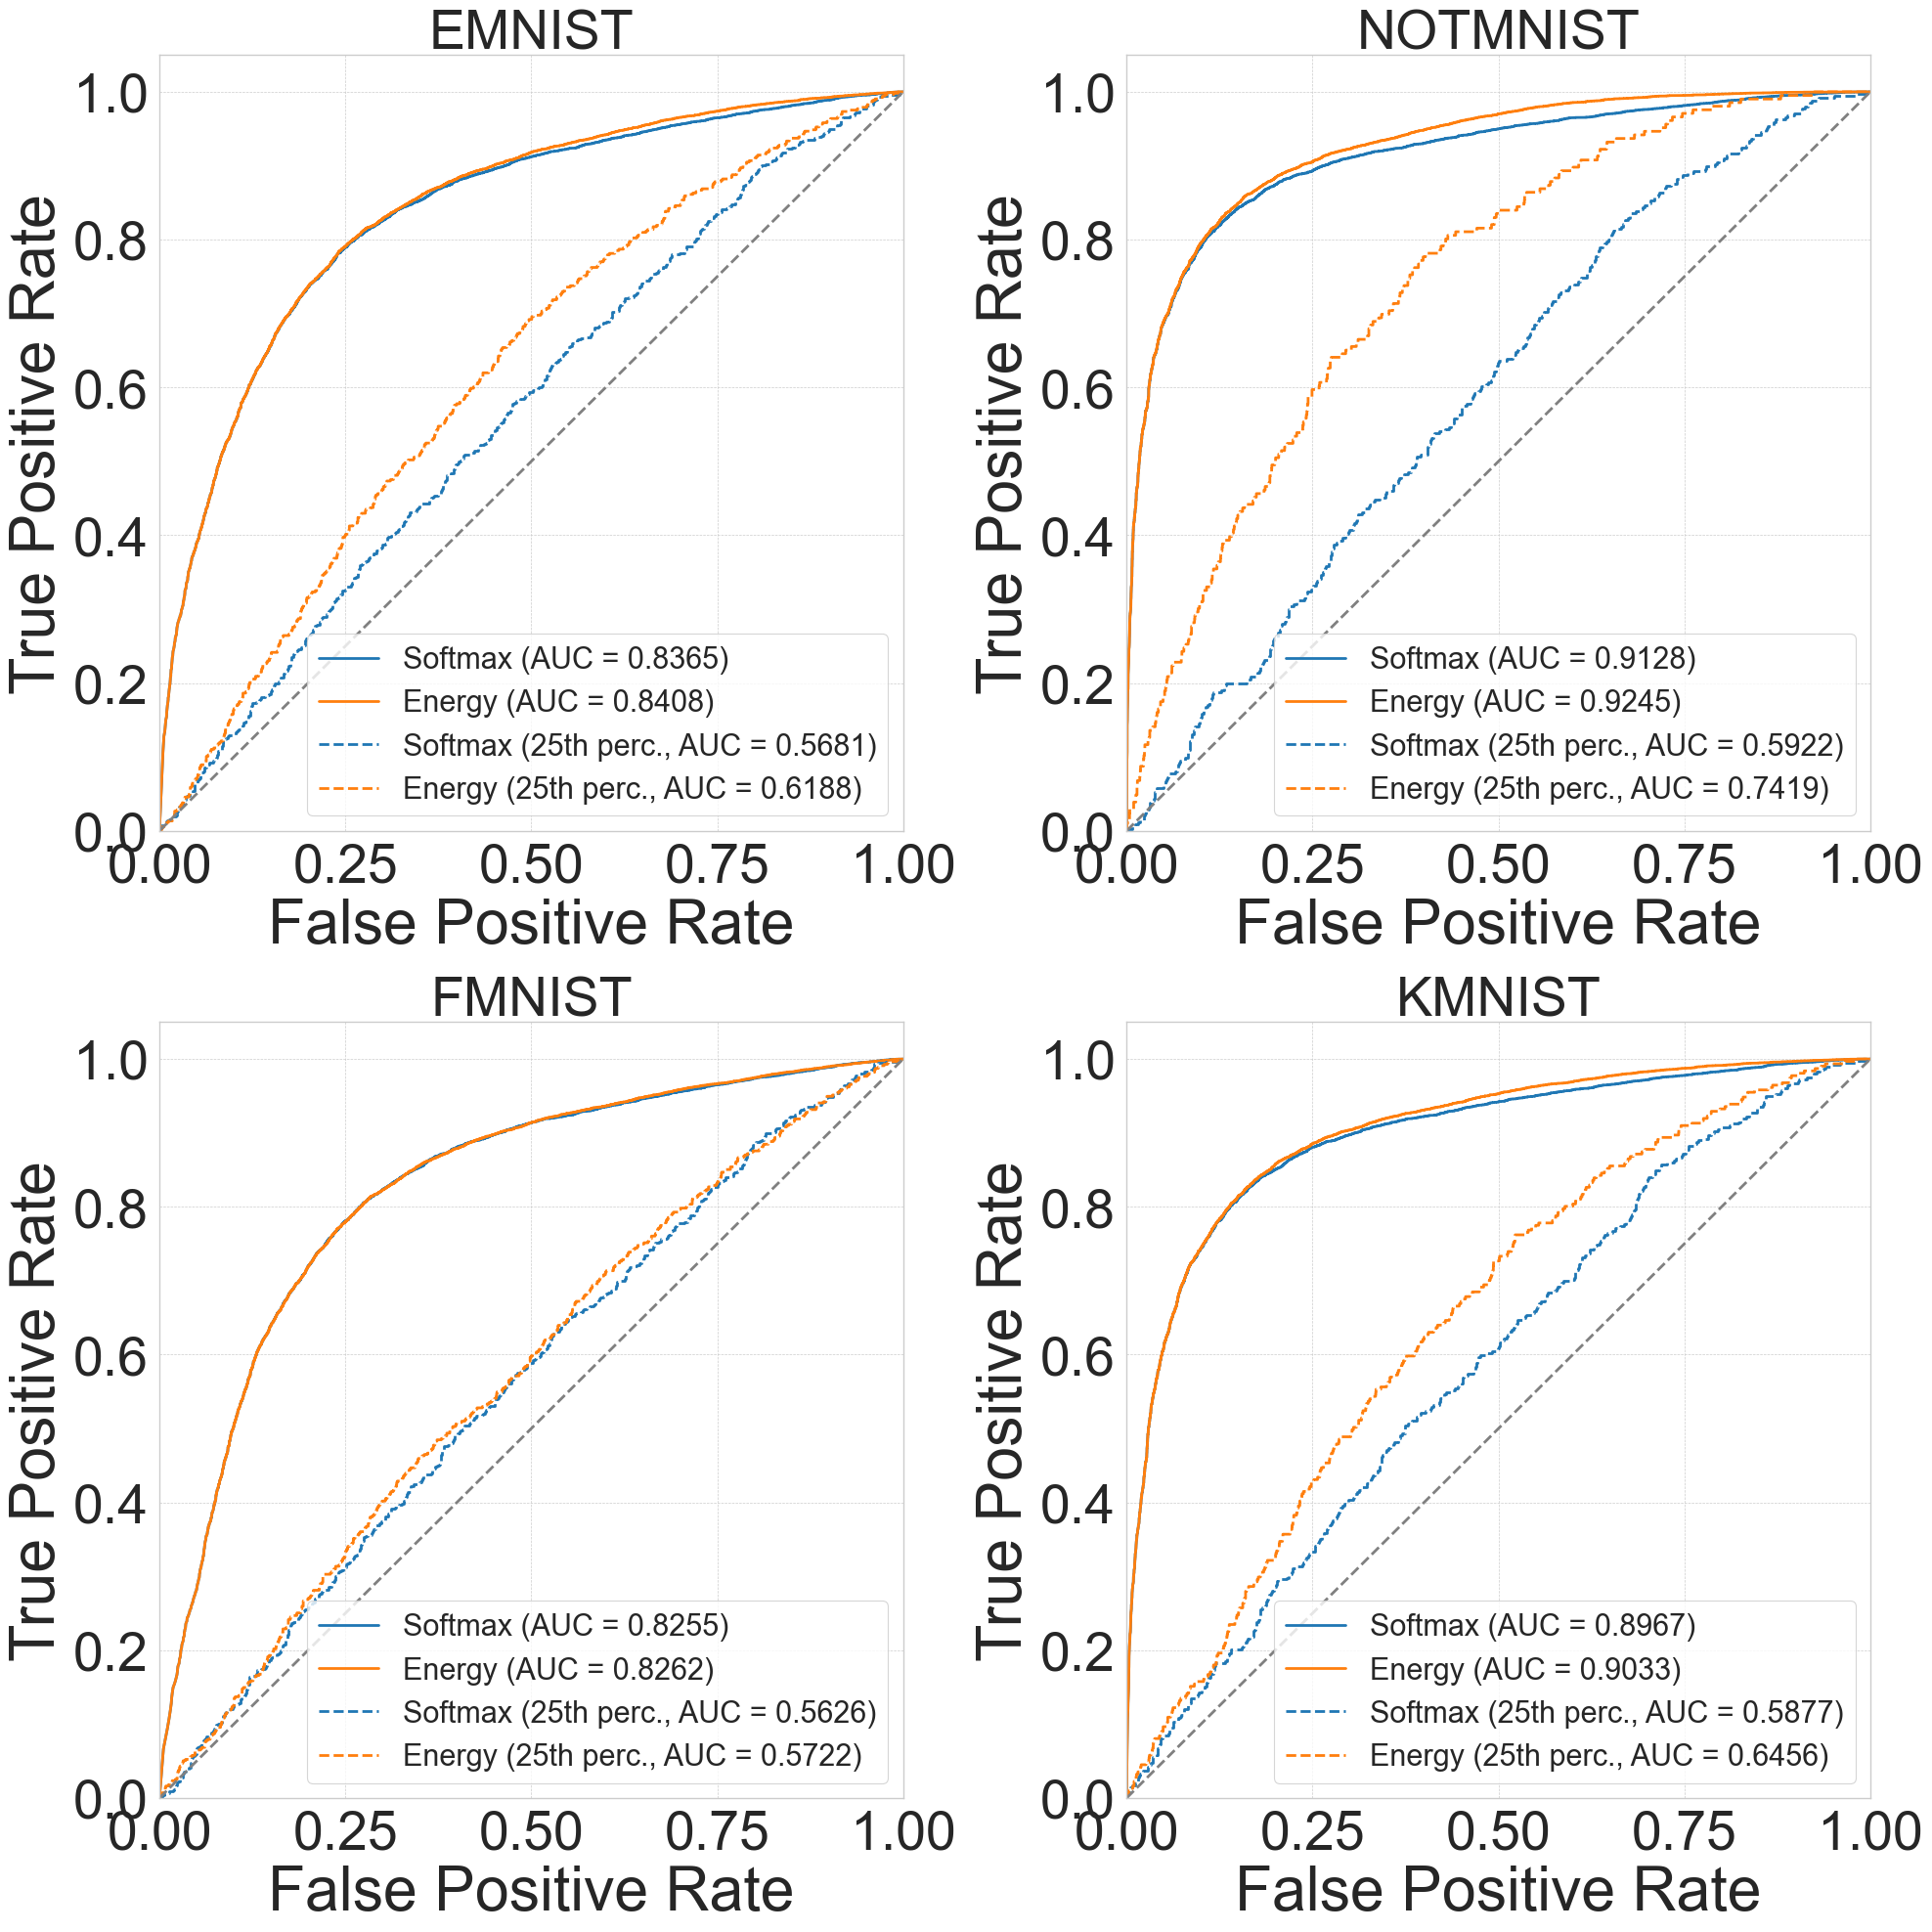

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

def plot_roc_curves_comparison(id_data, ood_data_dict, prefix_title=''):
    """
    Create ROC curves using softmax scores and probability scores to distinguish between in-distribution (ID) and out-of-distribution (OOD) data.
    Plot both the full range (100% percentile) and the bottom 25% percentile for each dataset.

    Parameters:
    - id_data: Tuple containing (max_softmax_values, p_post) for in-distribution data.
    - ood_data_dict: Dictionary containing dataset names as keys and tuples of (max_softmax_values, p_post) as values for out-of-distribution data.
    - prefix_title: String prefix to add before the title of the plot.
    """
    max_softmax_id, p_post_id = id_data

    # Convert JAX arrays to NumPy arrays for processing
    max_softmax_id_np = np.array(max_softmax_id)
    p_post_id_np = np.array(p_post_id)

    # Use seaborn style for better aesthetics
    sns.set(style="whitegrid", context="paper", font_scale=1.5)
    plt.figure(figsize=(20, 20))

    for i, (name, (max_softmax_ood, p_post_ood)) in enumerate(ood_data_dict.items()):
        max_softmax_ood_np = np.array(max_softmax_ood)
        p_post_ood_np = np.array(p_post_ood)

        # Create target vector (0 for OOD, 1 for ID)
        target_vector = np.concatenate([np.ones_like(max_softmax_id_np), np.zeros_like(max_softmax_ood_np)])

        # Concatenate the scores
        softmax_scores = np.concatenate([max_softmax_id_np, max_softmax_ood_np])
        prob_scores = np.concatenate([p_post_id_np, p_post_ood_np])

        # Compute ROC curve and ROC area for softmax scores (100% percentile)
        fpr_softmax_full, tpr_softmax_full, _ = roc_curve(target_vector, softmax_scores)
        roc_auc_softmax_full = auc(fpr_softmax_full, tpr_softmax_full)

        # Compute ROC curve and ROC area for probability scores (100% percentile)
        fpr_prob_full, tpr_prob_full, _ = roc_curve(target_vector, prob_scores)
        roc_auc_prob_full = auc(fpr_prob_full, tpr_prob_full)

        # Get the threshold values for the bottom 25% percentile
        softmax_threshold = np.percentile(softmax_scores, 25)
        prob_threshold = np.percentile(prob_scores, 25)

        # Select the bottom 25% of the scores
        softmax_scores_bottom_25_percent = softmax_scores[softmax_scores <= softmax_threshold]
        prob_scores_bottom_25_percent = prob_scores[prob_scores <= prob_threshold]

        # Adjust the target vector accordingly
        target_vector_softmax_bottom_25_percent = target_vector[softmax_scores <= softmax_threshold]
        target_vector_prob_bottom_25_percent = target_vector[prob_scores <= prob_threshold]

        # Compute ROC curve and ROC area for softmax scores (bottom 25%)
        fpr_softmax_25, tpr_softmax_25, _ = roc_curve(target_vector_softmax_bottom_25_percent, softmax_scores_bottom_25_percent)
        roc_auc_softmax_25 = auc(fpr_softmax_25, tpr_softmax_25)

        # Compute ROC curve and ROC area for probability scores (bottom 25%)
        fpr_prob_25, tpr_prob_25, _ = roc_curve(target_vector_prob_bottom_25_percent, prob_scores_bottom_25_percent)
        roc_auc_prob_25 = auc(fpr_prob_25, tpr_prob_25)

        # Plot ROC curves
        ax = plt.subplot(2, 2, i+1)
        
        # 100% percentile
        ax.plot(fpr_softmax_full, tpr_softmax_full, color='#1f77b4', lw=2, linestyle='-', label=f'Softmax (AUC = {roc_auc_softmax_full:.4f})')
        ax.plot(fpr_prob_full, tpr_prob_full, color='#ff7f0e', lw=2, linestyle='-', label=f'Energy (AUC = {roc_auc_prob_full:.4f})')

        # 25% percentile
        ax.plot(fpr_softmax_25, tpr_softmax_25, color='#1f77b4', lw=2, linestyle='--', label=f'Softmax (25th perc., AUC = {roc_auc_softmax_25:.4f})')
        ax.plot(fpr_prob_25, tpr_prob_25, color='#ff7f0e', lw=2, linestyle='--', label=f'Energy (25th perc., AUC = {roc_auc_prob_25:.4f})')

        ax.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=45)
        ax.set_ylabel('True Positive Rate', fontsize=45)
        ax.set_title(f'{name.upper()}', fontsize=40, pad=5)
        ax.legend(loc='lower right', fontsize=22, markerscale=2)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=40)

    # Adjust layout for better fit
    plt.tight_layout()
    
    # Save the figure as PDF
    plt.savefig("roc_curves_comparison_all.pdf", format='pdf', dpi=300)
    
    plt.show()

# Assuming mnist_data, emnist_data, notmnist_data, fmnist_data, kmnist_data are already defined
id_data = (mnist_data.max_softmax_values, mnist_data.p_post)
ood_data_dict = {
    'emnist': (emnist_data.max_softmax_values, emnist_data.p_post),    
    'notmnist': (notmnist_data.max_softmax_values, notmnist_data.p_post),
    'fmnist': (fmnist_data.max_softmax_values, fmnist_data.p_post),
    'kmnist': (kmnist_data.max_softmax_values, kmnist_data.p_post)
}

# Plot the ROC curves for each dataset
plot_roc_curves_comparison(id_data, ood_data_dict)
